In [1]:
import numpy as np
import tensorflow as tf
import keras
from pydub import AudioSegment
import sys
import io
import os
import glob
import IPython
from td_utils import *
%matplotlib inline

Using TensorFlow backend.
C:\Users\Dev\Miniconda3\envs\tfgpu\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


C:\Users\Dev\Miniconda3\envs\tfgpu\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


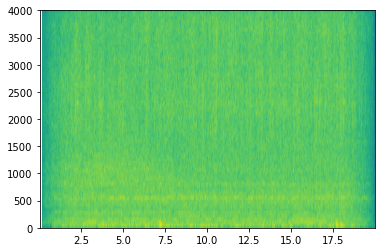

In [2]:
x = graph_spectrogram("./data/_background_noise_/exercise_bike.wav")

In [3]:
_, data = wavfile.read("./data/_background_noise_/exercise_bike.wav")
print("Time steps in audio recording before spectrogram", data.shape)
print("Time steps in input after spectrogram", x.shape)

Time steps in audio recording before spectrogram (160000,)
Time steps in input after spectrogram (101, 5511)


In [4]:
Tx = 5511
n_freq = 101
Ty = 1375

In [5]:
ons,offs,negatives,backgrounds = load_raw_audio() 
print("background len should be 10,000, since it is a 10 sec clip\n" + str(len(backgrounds[0])),"\n")
print("ons[0] len may be around 1000, since an `on` audio clip is usually around 1 second (but varies a lot) \n" + str(len(ons[0])),"\n")
print("ons[1] len: different `activate` clips can have different lengths\n" + str(len(ons[1])),"\n")
print("offs[0]\n" + str(len(offs[0])))

background len should be 10,000, since it is a 10 sec clip
10000 

ons[0] len may be around 1000, since an `on` audio clip is usually around 1 second (but varies a lot) 
743 

ons[1] len: different `activate` clips can have different lengths
975 

offs[0]
1000


In [6]:
def get_random_time_segment(segment_ms):

    
    segment_start = np.random.randint(low=0, high=10000-segment_ms)   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)

In [7]:
def is_overlapping(segment_time,previous_segments):
    segment_start, segment_end = segment_time
    overlap = False
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True     
    
    return overlap

In [8]:
def insert_audio_clip(background, audio_clip, previous_segments):
    segment_ms = len(audio_clip)
    segment_time = get_random_time_segment(segment_ms)
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)
    previous_segments.append(segment_time)
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

In [9]:
def insert_ones(y,segment_end_ms):
    segment_end_y = int(segment_end_ms * Ty / 10000.0)
    for i in range(segment_end_y+1, segment_end_y+51):
        if i < y.shape[1]:
            y[0, i] = 1
    return y

def insert_twos(y,segment_end_ms):
    segment_end_y = int(segment_end_ms*Ty/10000.0)
    for i in range(segment_end_y+1, segment_end_y+51):
        if i < y.shape[1]:
            y[0, i] = 2
    return y

In [10]:
def create_training_example(background, ons,offs, negatives):
    background = background - 20
    y = np.zeros((1,Ty))
    previous_segments = []
    number_of_ons = np.random.randint(1, 3)
    random_indices = np.random.randint(len(ons), size=number_of_ons)
    random_ons = [ons[i] for i in random_indices]
    for random_on in random_ons:
        background, segment_time = insert_audio_clip(background, random_on, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_ones(y, segment_end)
    
    number_of_offs = np.random.randint(1, 3)
    random_indices = np.random.randint(len(offs), size=number_of_offs)
    random_offs = [offs[i] for i in random_indices]
    for random_off in random_offs:
        background, segment_time = insert_audio_clip(background, random_off, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_twos(y, segment_end)
        
        
    number_of_negatives = np.random.randint(0, 2)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]
    for random_negative in random_negatives:
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
    
    background = match_target_amplitude(background, -20.0)
    file_handle = background.export("train" + ".wav", format="wav")
    print("File (train.wav) was saved in your directory.")
    x = graph_spectrogram("train.wav")
    
    return x, y

File (train.wav) was saved in your directory.


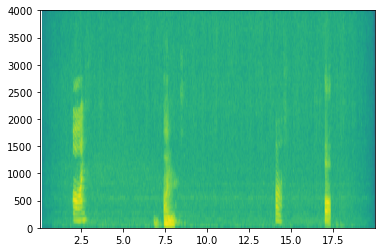

In [11]:
x, y = create_training_example(backgrounds[2], ons,offs, negatives)

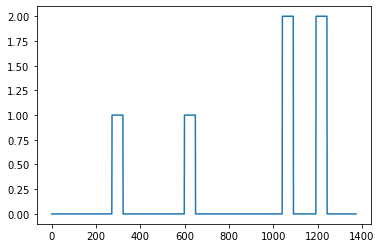

In [12]:
plt.plot(y[0])

In [13]:
print(x.shape)

(101, 5511)


File (train.wav) was saved in your directory.
0
File (train.wav) was saved in your directory.


C:\Users\Dev\Miniconda3\envs\tfgpu\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


1
File (train.wav) was saved in your directory.
2
File (train.wav) was saved in your directory.
3
File (train.wav) was saved in your directory.
4
File (train.wav) was saved in your directory.
5
File (train.wav) was saved in your directory.
6
File (train.wav) was saved in your directory.
7
File (train.wav) was saved in your directory.
8
File (train.wav) was saved in your directory.
9
File (train.wav) was saved in your directory.
10
File (train.wav) was saved in your directory.
11
File (train.wav) was saved in your directory.
12
File (train.wav) was saved in your directory.
13
File (train.wav) was saved in your directory.
14
File (train.wav) was saved in your directory.
15
File (train.wav) was saved in your directory.
16
File (train.wav) was saved in your directory.
17
File (train.wav) was saved in your directory.
18
File (train.wav) was saved in your directory.
19
File (train.wav) was saved in your directory.
20
File (train.wav) was saved in your directory.
21
File (train.wav) was saved

169
File (train.wav) was saved in your directory.
170
File (train.wav) was saved in your directory.
171
File (train.wav) was saved in your directory.
172
File (train.wav) was saved in your directory.
173
File (train.wav) was saved in your directory.
174
File (train.wav) was saved in your directory.
175
File (train.wav) was saved in your directory.
176
File (train.wav) was saved in your directory.
177
File (train.wav) was saved in your directory.
178
File (train.wav) was saved in your directory.
179
File (train.wav) was saved in your directory.
180
File (train.wav) was saved in your directory.
181
File (train.wav) was saved in your directory.
182
File (train.wav) was saved in your directory.
183
File (train.wav) was saved in your directory.
184
File (train.wav) was saved in your directory.
185
File (train.wav) was saved in your directory.
186
File (train.wav) was saved in your directory.
187
File (train.wav) was saved in your directory.
188
File (train.wav) was saved in your directory.


333
File (train.wav) was saved in your directory.
334
File (train.wav) was saved in your directory.
335
File (train.wav) was saved in your directory.
336
File (train.wav) was saved in your directory.
337
File (train.wav) was saved in your directory.
338
File (train.wav) was saved in your directory.
339
File (train.wav) was saved in your directory.
340
File (train.wav) was saved in your directory.
341
File (train.wav) was saved in your directory.
342
File (train.wav) was saved in your directory.
343
File (train.wav) was saved in your directory.
344
File (train.wav) was saved in your directory.
345
File (train.wav) was saved in your directory.
346
File (train.wav) was saved in your directory.
347
File (train.wav) was saved in your directory.
348
File (train.wav) was saved in your directory.
349
File (train.wav) was saved in your directory.
350
File (train.wav) was saved in your directory.
351
File (train.wav) was saved in your directory.
352
File (train.wav) was saved in your directory.


497
File (train.wav) was saved in your directory.
498
File (train.wav) was saved in your directory.
499
File (train.wav) was saved in your directory.
500
File (train.wav) was saved in your directory.
501
File (train.wav) was saved in your directory.
502
File (train.wav) was saved in your directory.
503
File (train.wav) was saved in your directory.
504
File (train.wav) was saved in your directory.
505
File (train.wav) was saved in your directory.
506
File (train.wav) was saved in your directory.
507
File (train.wav) was saved in your directory.
508
File (train.wav) was saved in your directory.
509
File (train.wav) was saved in your directory.
510
File (train.wav) was saved in your directory.
511
File (train.wav) was saved in your directory.
512
File (train.wav) was saved in your directory.
513
File (train.wav) was saved in your directory.
514
File (train.wav) was saved in your directory.
515
File (train.wav) was saved in your directory.
516
File (train.wav) was saved in your directory.


662
File (train.wav) was saved in your directory.
663
File (train.wav) was saved in your directory.
664
File (train.wav) was saved in your directory.
665
File (train.wav) was saved in your directory.
666
File (train.wav) was saved in your directory.
667
File (train.wav) was saved in your directory.
668
File (train.wav) was saved in your directory.
669
File (train.wav) was saved in your directory.
670
File (train.wav) was saved in your directory.
671
File (train.wav) was saved in your directory.
672
File (train.wav) was saved in your directory.
673
File (train.wav) was saved in your directory.
674
File (train.wav) was saved in your directory.
675
File (train.wav) was saved in your directory.
676
File (train.wav) was saved in your directory.
677
File (train.wav) was saved in your directory.
678
File (train.wav) was saved in your directory.
679
File (train.wav) was saved in your directory.
680
File (train.wav) was saved in your directory.
681
File (train.wav) was saved in your directory.


826
File (train.wav) was saved in your directory.
827
File (train.wav) was saved in your directory.
828
File (train.wav) was saved in your directory.
829
File (train.wav) was saved in your directory.
830
File (train.wav) was saved in your directory.
831
File (train.wav) was saved in your directory.
832
File (train.wav) was saved in your directory.
833
File (train.wav) was saved in your directory.
834
File (train.wav) was saved in your directory.
835
File (train.wav) was saved in your directory.
836
File (train.wav) was saved in your directory.
837
File (train.wav) was saved in your directory.
838
File (train.wav) was saved in your directory.
839
File (train.wav) was saved in your directory.
840
File (train.wav) was saved in your directory.
841
File (train.wav) was saved in your directory.
842
File (train.wav) was saved in your directory.
843
File (train.wav) was saved in your directory.
844
File (train.wav) was saved in your directory.
845
File (train.wav) was saved in your directory.


991
File (train.wav) was saved in your directory.
992
File (train.wav) was saved in your directory.
993
File (train.wav) was saved in your directory.
994
File (train.wav) was saved in your directory.
995
File (train.wav) was saved in your directory.
996
File (train.wav) was saved in your directory.
997
File (train.wav) was saved in your directory.
998
File (train.wav) was saved in your directory.
999
(1000, 5511, 101)
(1000, 1375, 1)


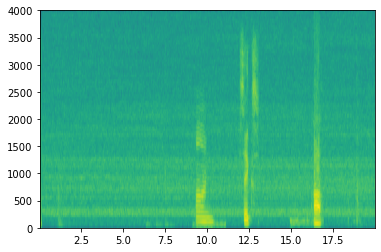

In [14]:
X = []
Y = []
for i in range(1000):
    x, y = create_training_example(backgrounds[i%3], ons,offs, negatives)
    print(i)
    x = np.array(x).T
    y = np.array(y).T
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

In [44]:
import keras 
import tensorflow as tf
from keras.layers import Input, LSTM, Conv1D, BatchNormalization, Activation, Dropout,Dense, TimeDistributed, MaxPooling1D

In [45]:
def create_model():
    input_A = Input(shape = X.shape[1:])
    x = Conv1D(64, strides = 4, kernel_size = 12)(input_A)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = Conv1D(128, strides = 1, kernel_size = 8, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(256, strides = 1, kernel_size = 8, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = Dropout(0.2)(x)
    x = LSTM(256,return_sequences = True)(x)
    x = BatchNormalization()(x) 
    x = Dropout(0.2)(x)
    x = TimeDistributed(Dense(3, activation = 'softmax'))(x)
    
    model = keras.Model(inputs = [input_A],outputs= [x])
    return model

In [35]:
model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 5511, 101)         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1375, 64)          77632     
_________________________________________________________________
batch_normalization_11 (Batc (None, 1375, 64)          256       
_________________________________________________________________
activation_8 (Activation)    (None, 1375, 64)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1375, 128)         65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 1375, 128)         512       
_________________________________________________________________
activation_9 (Activation)    (None, 1375, 128)         0   

In [36]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model3.h5",save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights= True)

In [37]:
adam = keras.optimizers.Adam(learning_rate=0.01)
rms = keras.optimizers.RMSprop(learning_rate = 0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = adam, metrics=['accuracy'])
history = model.fit(X,Y,epochs = 30,validation_split = 0.1,batch_size = 5,callbacks = [checkpoint_cb,early_stopping_cb])

Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 278s 309ms/step - loss: 0.4776 - accuracy: 0.8708 - val_loss: 0.4208 - val_accuracy: 0.8943
Epoch 2/30
900/900 [==============================] - 271s 301ms/step - loss: 0.3198 - accuracy: 0.8897 - val_loss: 0.5176 - val_accuracy: 0.8943
Epoch 3/30
900/900 [==============================] - 271s 302ms/step - loss: 0.2991 - accuracy: 0.8890 - val_loss: 0.3391 - val_accuracy: 0.8943
Epoch 4/30
900/900 [==============================] - 281s 313ms/step - loss: 0.2904 - accuracy: 0.8895 - val_loss: 0.3894 - val_accuracy: 0.8943
Epoch 5/30
900/900 [==============================] - 271s 301ms/step - loss: 0.2934 - accuracy: 0.8895 - val_loss: 1.0490 - val_accuracy: 0.8942
Epoch 6/30
900/900 [==============================] - 272s 302ms/step - loss: 0.2959 - accuracy: 0.8905 - val_loss: 0.3482 - val_accuracy: 0.8933
Epoch 7/30
900/900 [==============================] - 465s 516ms/step - loss: 

In [38]:
import pandas as pd
def plot_training_accuracy(history):

    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

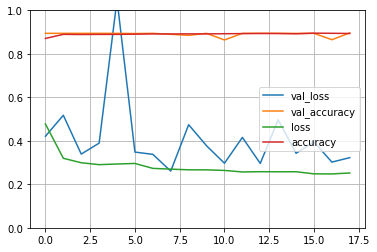

In [39]:
plot_training_accuracy(history)

In [40]:
def detect_triggerword(filename):
    plt.subplot(2, 1, 1)

    x = graph_spectrogram(filename)
    # the spectrogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x  = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
    print(predictions.shape)
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,1],label = 'on pred')
    plt.plot(predictions[0,:,2], label = 'off_pred')
    plt.ylabel('probability')
    plt.legend()
    plt.show()
    return predictions

In [48]:
chime_file = "chime.wav"
beep_file = 'beep.wav'
def chime_on_activate(filename, predictions, threshold_on, threshold_off):
    audio_clip = AudioSegment.from_wav(filename)
    chime = AudioSegment.from_wav(chime_file)
    beep = AudioSegment.from_wav(beep_file)
    Ty = predictions.shape[1]
    # Step 1: Initialize the number of consecutive output steps to 0
    consecutive_timesteps = 0
    # Step 2: Loop over the output steps in the y
    for i in range(Ty):
        # Step 3: Increment consecutive output steps
        consecutive_timesteps += 1
        # Step 4: If prediction is higher than the threshold and more than 75 consecutive output steps have passed
        if predictions[0,i,1]>threshold_on and predictions[0,i,1]>predictions[0,i,2] and consecutive_timesteps>75 :
            audio_clip = audio_clip.overlay(beep, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            consecutive_timesteps = 0
            
        if predictions[0,i,2] > threshold_off and predictions[0,i,2]>predictions[0,i,1] and consecutive_timesteps > 75:
            audio_clip = audio_clip.overlay(chime, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            consecutive_timesteps = 0
            
            
    
    audio_clip.export("chime_output.wav", format='wav')

In [ ]:
_,_ = create_training_example(backgrounds[2], ons,offs, negatives)
IPython.display.Audio("./train.wav")

In [ ]:
#When the model predicts off we get chime and beep for on output
filename = "./train.wav"
prediction = detect_triggerword(filename)
chime_on_activate(filename, prediction, 0.3,0.3)
IPython.display.Audio("./chime_output.wav")

In [54]:
# from keras.models import save
model.save('good_model.h5')